## 1. Installing & importing libraries we will need

In [5]:
%pip install --upgrade --quiet natural_pdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
from natural_pdf import PDF
import numpy as np
import pandas as pd
import openpyxl
from transliterate import translit
from collections import Counter
import matplotlib.pyplot as plt
import re

In [7]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

## 2. Getting the data

Source: [The Agency for Prevention of Corruption](https://publicacas.acas.rs)

*The data was originally published as 10 separate annual PDFs. These were merged into two combined files — one for 2015–2019 and one for 2020–2024 — because the table structure changed starting in 2020, requiring different extraction logic.*



In [8]:
pdf_one = PDF("/Users/teodoracurcic/Downloads/Lede/projects/01-gifts/lede2025-gifts-to-public-officials/gifts_one.pdf")
pdf_two = PDF("/Users/teodoracurcic/Downloads/Lede/projects/01-gifts/lede2025-gifts-to-public-officials/gifts_two.pdf")

##### Extracting data from the first PDF

In [9]:
pdf_one.add_exclusion('rect[fill=#d8dae5]')
sections = pdf_one.pages.get_sections(end_elements='rect[fill=#f3f1f1][width>200]')

In [10]:
all_tables = []

for i, section in enumerate(sections):
    try:
        df = section.extract_table(
            stitch_rows=lambda prev, cur, i, seg: (
                not cur[0] and not cur[5]
            )
        ).to_df(header=False)
    except:
        df = section.extract_table().to_df(header=False)
    
    df = df.dropna(subset=[1])
    all_tables.append(df)

gifts_one = pd.concat(all_tables, ignore_index=True)
gifts_one = gifts_one.map(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)
gifts_one.head()

,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
1,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Бечеј,29.01.2015,Протоколаран,Монографија ОТКРИВАЊЕ НАШЕГ ЗАБОРАВЉЕНОГ КУЛТУ...,,Да,јавна својина
2,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Витомир Николић,30.01.2015,Пригодан,Кнњига аутора Основана школа у Криваји,"1.000,00",,лична својина јавног функцион ера
3,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,СЛИКА уље на платну непознатог аутора,,Да,јавна својина
4,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,Монографија МУЗЕЈ РАС НОВИ ПАЗАР,"3.000,00",,јавна својина


In [11]:
gifts_one.columns = ['public_institution', 'name', 'role', 'giver', 'date_received', 'gift_type', 'gift', 'value_rsd', 'estimating', 'ownership']
gifts_one.head()

,public_institution,name,role,giver,date_received,gift_type,gift,value_rsd,estimating,ownership
0,,,,,,,,,,
1,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Бечеј,29.01.2015,Протоколаран,Монографија ОТКРИВАЊЕ НАШЕГ ЗАБОРАВЉЕНОГ КУЛТУ...,,Да,јавна својина
2,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Витомир Николић,30.01.2015,Пригодан,Кнњига аутора Основана школа у Криваји,"1.000,00",,лична својина јавног функцион ера
3,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,СЛИКА уље на платну непознатог аутора,,Да,јавна својина
4,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,Монографија МУЗЕЈ РАС НОВИ ПАЗАР,"3.000,00",,јавна својина


In [12]:
gifts_one.dtypes

public_institution    object
name                  object
role                  object
giver                 object
date_received         object
gift_type             object
gift                  object
value_rsd             object
estimating            object
ownership             object
dtype: object

##### Extracting data from the second PDF

In [13]:
pdf_two.add_exclusion('rect[fill=#d8dae5]')
sections = pdf_two.pages.get_sections(end_elements='rect[fill=#f3f1f1][width>200]')

In [14]:
all_tables = []

for i, section in enumerate(sections):
    try:
        df = section.extract_table(
            stitch_rows=lambda prev, cur, i, seg: (
                not cur[0] and not cur[5]
            )
        ).to_df(header=False)
    except:
        df = section.extract_table().to_df(header=False)
    
    df = df.dropna(subset=[1])
    all_tables.append(df)

gifts_two = pd.concat(all_tables, ignore_index=True)
gifts_two = gifts_two.map(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)
gifts_two.head()

,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
1,Скупштина града Новог Сада,Здравко Јелушић,Председник,23.01.2020,ОБЕЛЕЖАВ АЊЕ 78. ГОДИШЊИ ЦЕ НОВОСАДС КЕ РАЦИЈЕ,"МОНОГРАФИЈА ""РЕЧНА ФЛОТИЛА 2008-2018""","3.000,00",Не,Протоколаран,јавна својина
2,Скупштина града Новог Сада,Здравко Јелушић,Председник,03.01.2020,НОВОГОДИ ШЊИ ПРАЗНИЦИ,УКРАСНИ КЕРАМИЧКИ ТАЊИР,"2.500,00",Не,Протоколаран,јавна својина
3,Скупштина града Новог Сада,Здравко Јелушић,Председник,22.01.2020,ПОСЕТА ДЕЛЕГАЦИЈ Е,УМЕТНИЧКА СЛИКА,"20.000,00",Не,Протоколаран,јавна својина
4,Скупштина града Новог Сада,Здравко Јелушић,Председник,01.02.2020,ДАН ГРАДА,СЛИКА,"5.600,00",Не,Протоколаран,јавна својина


In [15]:
gifts_two.columns = ['public_institution', 'name', 'role', 'date_received', 'occasion', 'gift', 'value_rsd', 'estimating', 'gift_type', 'ownership']
gifts_two.head()

,public_institution,name,role,date_received,occasion,gift,value_rsd,estimating,gift_type,ownership
0,,,,,,,,,,
1,Скупштина града Новог Сада,Здравко Јелушић,Председник,23.01.2020,ОБЕЛЕЖАВ АЊЕ 78. ГОДИШЊИ ЦЕ НОВОСАДС КЕ РАЦИЈЕ,"МОНОГРАФИЈА ""РЕЧНА ФЛОТИЛА 2008-2018""","3.000,00",Не,Протоколаран,јавна својина
2,Скупштина града Новог Сада,Здравко Јелушић,Председник,03.01.2020,НОВОГОДИ ШЊИ ПРАЗНИЦИ,УКРАСНИ КЕРАМИЧКИ ТАЊИР,"2.500,00",Не,Протоколаран,јавна својина
3,Скупштина града Новог Сада,Здравко Јелушић,Председник,22.01.2020,ПОСЕТА ДЕЛЕГАЦИЈ Е,УМЕТНИЧКА СЛИКА,"20.000,00",Не,Протоколаран,јавна својина
4,Скупштина града Новог Сада,Здравко Јелушић,Председник,01.02.2020,ДАН ГРАДА,СЛИКА,"5.600,00",Не,Протоколаран,јавна својина


##### Merging & exporting data

In [16]:
gifts = pd.concat([gifts_one, gifts_two], ignore_index=True)
gifts.head()

,public_institution,name,role,giver,date_received,gift_type,gift,value_rsd,estimating,ownership,occasion
0,,,,,,,,,,,NaN
1,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Бечеј,29.01.2015,Протоколаран,Монографија ОТКРИВАЊЕ НАШЕГ ЗАБОРАВЉЕНОГ КУЛТУ...,,Да,јавна својина,NaN
2,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Витомир Николић,30.01.2015,Пригодан,Кнњига аутора Основана школа у Криваји,"1.000,00",,лична својина јавног функцион ера,NaN
3,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,СЛИКА уље на платну непознатог аутора,,Да,јавна својина,NaN
4,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,Монографија МУЗЕЈ РАС НОВИ ПАЗАР,"3.000,00",,јавна својина,NaN


In [17]:
gifts.shape

(5188, 11)

In [18]:
gifts = gifts.replace ('NaN', np.nan)
gifts = gifts.replace ('', np.nan)

In [19]:
gifts = gifts.dropna(how='all')

In [20]:
gifts.shape

(5151, 11)

## 3. Cleaning data 

In [21]:
gifts.head()

,public_institution,name,role,giver,date_received,gift_type,gift,value_rsd,estimating,ownership,occasion
1,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Бечеј,29.01.2015,Протоколаран,Монографија ОТКРИВАЊЕ НАШЕГ ЗАБОРАВЉЕНОГ КУЛТУ...,NaN,Да,јавна својина,NaN
2,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Витомир Николић,30.01.2015,Пригодан,Кнњига аутора Основана школа у Криваји,"1.000,00",NaN,лична својина јавног функцион ера,NaN
3,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,СЛИКА уље на платну непознатог аутора,NaN,Да,јавна својина,NaN
4,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,29.01.2015,Протоколаран,Монографија МУЗЕЈ РАС НОВИ ПАЗАР,"3.000,00",NaN,јавна својина,NaN
5,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Божидар Рогановић,02.02.2015,Пригодан,књига аутора РЕТОРИКА,"1.000,00",NaN,лична својина јавног функцион ера,NaN


#### Cleaning up *value* column & converting to float

In [22]:
gifts['value_rsd'].unique()

array([nan, '1.000,00', '3.000,00', '750,00', '8.000,00',
       '2000.00 11750.00 0 13750.00', '5.350,00', '4.200,00', '39.360,00',
       '29.520,00', '15.990,00', '1.300,00', '18.000,00',
       '0 113720.00 0 113720.00', '10.000,00', '4.000,00', '6.000,00',
       '1.500,00', '2.000,00', '3.500,00', '7.000,00', '15.000,00',
       '2.500,00', '5.500,00', '80.000,00', '40.000,00', '35.000,00',
       '0 293500.00 0 293500.00', '0 0 0 0', '5.000,00', '9.300,00',
       '70.000,00', '4.500,00', '0 206100.00 0 206100.00', '400,00',
       '300,00', '500,00', '1.200,00', '3400.00 0 0 3400.00', '100,00',
       '200,00', '600,00', '250,00', '700,00', '800,00', '850,00',
       '1.400,00', '2.350,00', '650,00', '550,00', '450,00', '350,00',
       '150,00', '2.800,00', '1.600,00', '6.990,00', '4.300,00', '900,00',
       '12.000,00', '2.300,00', '7.700,00', '2.200,00',
       '47050.00 129540.00 0 176590.00', '38800.00 0 0 38800.00',
       '7.900,00', '3.600,00', '0 11500.00 0 11500.00',

In [23]:
gifts['value_rsd'] = (
    gifts['value_rsd']
    .astype(str)
    .str.extract(r'(\d[\d\.]*,\d{2})')
    .iloc[:, 0]
)

gifts['value_rsd'] = (
    gifts['value_rsd']
    .str.replace('.', '', regex=False) 
    .str.replace(',', '.', regex=False) 
    .astype(float)                    
)

In [24]:
gifts.dtypes

public_institution     object
name                   object
role                   object
giver                  object
date_received          object
gift_type              object
gift                   object
value_rsd             float64
estimating             object
ownership              object
occasion               object
dtype: object

#### Fixing datetime

In [25]:
gifts['date_received'].unique()

array(['29.01.2015', '30.01.2015', '02.02.2015', '15.01.2015',
       '05.02.2015', nan, '01.02.2015', '14.01.2015', '18.02.2015',
       '19.02.2015', '23.02.2015', '25.02.2015', '05.03.2015',
       '20.04.2015', '28.04.2015', '21.06.2015', '22.06.2015',
       '28.06.2015', '01.07.2015', '22.07.2015', '24.07.2015',
       '29.07.2015', '06.08.2015', '15.09.2015', '22.09.2015',
       '29.09.2015', '01.10.2015', '06.10.2015', '09.10.2015',
       '19.10.2015', '31.10.2015', '17.11.2015', '18.11.2015',
       '26.11.2015', '17.12.2015', '28.12.2015', '31.12.2015',
       '11.03.2015', '12.03.2015', '13.04.2015', '08.04.2015',
       '12.05.2015', '29.06.2015', '30.07.2015', '27.05.2015',
       '14.07.2015', '05.07.2015', '04.05.2015', '19.05.2015',
       '21.09.2015', '17.10.2015', '11.11.2015', '13.11.2015',
       '16.12.2015', '26.05.2015', '22.01.2015', '26.02.2015',
       '02.04.2015', '16.04.2015', '23.06.2015', '09.07.2015',
       '28.07.2015', '10.08.2015', '20.10.2015', '

In [26]:
blank_gifts = gifts[gifts['date_received'].isna()]
blank_gifts

,public_institution,name,role,giver,date_received,gift_type,gift,value_rsd,estimating,ownership,occasion
8,ЗОРАНА МИХАЈЛОВИЋ,NaN,NaN,NaN,NaN,NaN,Укупна вредност личне својине Укупна вредност ...,NaN,NaN,NaN,NaN
16,Милош Вучевић,NaN,NaN,NaN,NaN,NaN,Укупна вредност личне својине Укупна вредност ...,NaN,NaN,NaN,NaN
48,Александар Вучић,NaN,NaN,NaN,NaN,NaN,Укупна вредност личне својине Укупна вредност ...,NaN,NaN,NaN,NaN
74,Маја Гојковић,NaN,NaN,NaN,NaN,NaN,Укупна вредност личне својине Укупна вредност ...,NaN,NaN,NaN,NaN
97,Небојша Стефановић,NaN,NaN,NaN,NaN,NaN,Укупна вредност личне својине Укупна вредност ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4742,Републике,NaN,None,NaN,None,None,"Србије, један димензија 45x35 cm, други 53x53 cm.",NaN,None,None,а Београда
4781,Републике,NaN,None,NaN,None,None,None,NaN,None,None,линије за производњ у новог модела Fiat Grande...
5144,права и друштвени дијалог,NaN,None,NaN,None,None,козметика (купка),NaN,None,јавног функционе ра,новогодиш њих и божићних празника
5154,права и друштвени дијалог,NaN,None,NaN,None,None,Цегер и календар,NaN,None,јавног функционе ра,новогодиш њих и божићних празника


In [27]:
gifts = gifts.dropna(subset=['date_received'])
gifts.shape

(4981, 11)

In [28]:
gifts['date_received'] = (
    gifts['date_received']
    .astype(str)
    .str.strip()
    .str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0] 
)

In [29]:
gifts['date_received'] = pd.to_datetime(gifts['date_received'], format = '%d.%m.%Y', errors='coerce')

In [30]:
gifts['year'] = gifts['date_received'].dt.year
year_column = gifts.pop('year')
gifts.insert(5, 'year', year_column) 

gifts['month'] = gifts['date_received'].dt.strftime('%m-%Y')
month_column = gifts.pop('month')
gifts.insert(6, 'month', month_column) 

gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion
1,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Бечеј,2015-01-29,2015,01-2015,Протоколаран,Монографија ОТКРИВАЊЕ НАШЕГ ЗАБОРАВЉЕНОГ КУЛТУ...,NaN,Да,јавна својина,NaN
2,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Витомир Николић,2015-01-30,2015,01-2015,Пригодан,Кнњига аутора Основана школа у Криваји,1000.0,NaN,лична својина јавног функцион ера,NaN
3,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,2015-01-29,2015,01-2015,Протоколаран,СЛИКА уље на платну непознатог аутора,NaN,Да,јавна својина,NaN
4,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Општина Нови Пазар,2015-01-29,2015,01-2015,Протоколаран,Монографија МУЗЕЈ РАС НОВИ ПАЗАР,3000.0,NaN,јавна својина,NaN
5,Влада Републике Србије,ЗОРАНА МИХАЈЛОВИЋ,"министар грађевинарства , саобраћаја и инфраст...",Божидар Рогановић,2015-02-02,2015,02-2015,Пригодан,књига аутора РЕТОРИКА,1000.0,NaN,лична својина јавног функцион ера,NaN


In [31]:
gifts.groupby(['year'])['value_rsd'].sum().reset_index()

,year,value_rsd
0,2015,1233530.00
1,2016,1559320.00
2,2017,3076727.00
3,2018,2404484.52
4,2019,3557003.00
5,2020,3620955.00
6,2021,13024681.64
7,2022,6002525.78
8,2023,7789248.00
9,2024,7607494.75


#### Cleaning *ownership* column

In [32]:
gifts['ownership'].unique()

array(['јавна својина', 'лична својина јавног функцион ера',
       'лична својина јавног функционе ра', 'лична својина'], dtype=object)

In [33]:
gifts['ownership'] = gifts['ownership'].replace({
    "лична својина јавног функцион ера": "лична својина",
    "лична својина јавног функционе ра": "лична својина",
}, regex=False)

#### Cleaning *name* column

In [34]:
gifts['name'].unique()

array(['ЗОРАНА МИХАЈЛОВИЋ', 'Милош Вучевић', 'Александар Вучић',
       'Маја Гојковић', 'АЛЕКСАНДАР АНТИЋ', 'Вања Удовичић',
       'Небојша Стефановић', 'Зоран Ђорђевић', 'Братислав Гашић',
       'Славољуб Дабић', 'Драгана Марковић', 'Јоргованка Табаковић',
       'Весна Илић Прелић', 'ЗОРАН ПАНОВИЋ', 'Ивица Дачић',
       'Горан Алексић', 'Татјана Бабић', 'Сретен Јовановић',
       'Тихомир Петковић', 'Снежана Богосављевић Бошковић',
       'Зоран Стојковић', 'Марија Лабовић', 'Саша Павлов',
       'Маријана Дукић Мијатовић', 'Златибор Лончар', 'Ненад Нерић',
       'РОКСАНДА НИНЧИЋ', 'Владимир Марић', 'Младен Шарчевић',
       'Дејан Дамњановић', 'ИГОР МИРОВИЋ', 'Ђорђе Милићевић',
       'Срђан Кружевић', 'Стеван Шуша', 'Весна Прћић', 'МИЛУН ЈОВАНОВИЋ',
       'БРАНИСЛАВ МИТРОВИЋ', 'Бојан Синђелић', 'Милена Вићевић',
       'Синиша Мали', 'Андреја Младеновић', 'Југослав Јовић',
       'Душанка Голубовић', 'ДИМИТРИЈЕ ПАУНОВИЋ', 'МИЛОРАД РАДОЈЕВИЋ',
       'Зоран Пашалић', 'Предраг 

In [35]:
gifts['name'] = gifts['name'].str.title()

In [36]:
gifts['name'] = gifts['name'].apply(
    lambda x: 'Дина Вучинић (Малешевић)' if x.strip() == 'Дина Вучинић' else x
)

#### Cleaning *public_institution* column

In [37]:
gifts['public_institution'].unique()

array(['Влада Републике Србије', 'Град Нови Сад',
       'Генерални секретаријат Владе',
       'Народна скупштина Републике Србије',
       'Министарство рударства и енергетике',
       'Министарство омладине и спорта',
       'Министарство унутрашњих послова', 'Министарство одбране',
       'Министарство грађевинарства, саобраћаја и инфраструктуре',
       'Министарство финансија - Пореска управа', 'Народна банка Србије',
       'Уставни суд', 'Завод за социјално осигурање',
       'Министарство спољних послова',
       'Агенција за борбу против корупције', 'Град Краљево', 'Град Ужице',
       'Министарство пољопривреде и заштите животне средине',
       'Министарство одбране - Војнообавештајна агенција',
       'Туристичка организација Србије', 'Град Панчево',
       'Служба извршних органа града Новог Сада', 'Министарство здравља',
       'Министарство просвете, науке и технолошког развоја, Београд',
       'Покрајинска Влада АП Војводине',
       'Канцеларија за локални економски 

In [38]:
gifts['public_institution'] = gifts['public_institution'].replace({
    'Министарство пољопривреде, шумарства и': 'Министарство пољопривреде, шумарства и водопривреде',
    'Министарство пољопривреде,': 'Министарство пољопривреде, шумарства и водопривреде',
    'за ветерину Министарство пољопривреде, шумарства и': 'Министарство пољопривреде, шумарства и водопривреде - Управа за ветерину',
    'Министарство пољопривреде, шумарства и водопривреде Министарство': 'Министарство пољопривреде, шумарства и водопривреде',
    'Министарство пољопривреде, шумарства и водопривреде - Управа за ветерину Министарство': 'Министарство пољопривреде, шумарства и водопривреде - Управа за ветерину',
    'Министарство спољних послова Републике': 'Министарство спољних послова',
    'Србије Министарство спољних послова Републике Србије': 'Министарство спољних послова',
    'послова Министарство спољних послова': 'Министарство спољних послова',
    'Министарство информисања и': 'Министарство информисања и телекомуникација',
    'Министарство унутрашње и спољне': 'Министарство унутрашње и спољне трговине',
    'трговине Министарство унутрашње и спољне трговине': 'Министарство унутрашње и спољне трговине',
    'унутрашње и спољне трговине Министарство унутрашње и спољне': 'Министарство унутрашње и спољне трговине',
    'унутрашње и спољне трговине Министарство': 'Министарство унутрашње и спољне трговине',
    'Министарство за људска и мањинска': 'Министарство за људска и мањинска права и друштвени дијалог',
    'Министарство финансија Министарство': 'Министарство финансија',
    'финансија Министарство финансија': 'Министарство финансија',
    'финансија': 'Министарство финансија',
    'Генерални секретаријат Председника Републике Генерални': 'Генерални секретаријат Председника',
    'Републике Генерални секретаријат Председника Републике': 'Генерални секретаријат Председника',
    'Генерални секретаријат Председника': 'Генерални секретаријат Председника',
    'Републике Генерални секретаријат Председника': 'Генерални секретаријат Председника',
    'Генерални секретаријат Владе Р. Србије': 'Генерални секретаријат Владе',
    'агенција Безбедносно- информативна': 'Безбедносно-информативна агенција',
    'Безбедносно- информативна': 'Безбедносно-информативна агенција',
    'Безбедносно- информативна агенција': 'Безбедносно-информативна агенција',
    'агенција Безбедносно- информативна агенција': 'Безбедносно-информативна агенција',
    'Министарство привреде Министарство': 'Министарство привреде',
    'привреде Министарство привреде': 'Министарство привреде',
    'Новог Сада Скупштина града Новог Сада': 'Скупштина града Новог Сада',
    'унутрашњих послова Министарство унутрашњих послова': 'Министарство унутрашњих послова',
    'Министарство просвете, науке и технолошког развоја, Београд': 'Министарство просвете',
    'локалне самоуправе Министарство државне управе и локалне самоуправе': 'Министарство државне управе и локалне самоуправе',
    'Републике Генерални секретаријат Председника Републике Генерални': 'Генерални секретаријат Председника',
    'инфраструктуре Министарство грађевинарства, саобраћаја и инфраструктуре': 'Министарство грађевинарства, саобраћаја и инфраструктуре',
    'Агенција за борбу против корупције': 'Агенција за спречавање корупције (некада Агенција за борбу против корупције)',
    'Агенција за спречавање корупције': 'Агенција за спречавање корупције (некада Агенција за борбу против корупције)'
})


In [39]:
gifts['public_institution'] = gifts['public_institution'].replace({
    'Генерални секретаријат': 'Генерални секретаријат Председника'
}, regex=False)

#### Cleaning *role* column

In [40]:
gifts['role'].unique()

array(['министар грађевинарства , саобраћаја и инфраструктур е',
       'Градоначелник', 'Председник Владе', 'Председник',
       'министар рударства и енергетике', 'Министар омладине и спорта',
       'министар унутрашњих послова', 'Државни секретар',
       'Министар одбране', 'Директор', 'Гувернер', 'Председник суда',
       'Министар', 'в.д. помоћника министра', 'Председник Скупштине',
       'Заменик директора', 'В.Д. Директора', 'шеф Канцеларије',
       'Потпредседник Владе', 'Министар спољних послова', 'Амбасадор РС',
       'Министар просвете, науке и технолошког развоја',
       'Шеф канцеларије директора', 'Заменик Градоначелник а',
       'Шеф Канцеларија за Локални економски развој',
       'Председник Општине', 'В.Д. Генералног Директора', 'Начелник',
       'Члан већа', 'Заштитник грађана', 'Председник Републике',
       'Народни посланик', 'Покрајински секретар',
       'министар за рад, запошљавање, борачка и социјална питања',
       'Председник Народне скупштине', 'П

In [41]:
gifts['role'] = gifts['role'].replace({
    'министар грађевинарства , саобраћаја и инфраструктур е': 'министар',
    'министар рударства и енергетике': 'министар',
    'министар унутрашњих послова': 'министар',
    'Министар омладине и спорта': 'министар',
    'Министар одбране': 'министар',
    'Министар спољних послова': 'министар',
    'Министар просвете, науке и технолошког развоја': 'министар',
    'министар за рад, запошљавање, борачка и социјална питања': 'министар',
    'Министар': 'министар',
    'Министар Министар': 'министар',
    'Владе и Министар Потпредседник Владе и Министар': 'потпредседник Владе и министар',
    'Владе и Министар Први потпредседник Владе и Министар': 'први потпредседник Владе и министар',
    'Први потпредседник Владе и Министар': 'први потпредседник Владе и министар',

    'Градоначелник': 'градоначелник',
    'Заменик Градоначелник а': 'заменик градоначелника',
    'скупштине града председник скупштине града': 'председник скупштине града',
    'скупштине града председник скупштине града': 'председник скупштине града',

    'скупштине Председник Народне скупштине': 'председник Народне скупштине',
    'Председник Народне': 'председник Народне скупштине',
    'народни посланик': 'посланик',

    'Амбасадор РС': 'амбасадор',
    'Амбасадор РС у Аустралији': 'амбасадор',
})

In [42]:
gifts['role'] = gifts['role'].str.lower()

#### Cleaning *estimating* column

#### Transliterate & save

In [43]:
gifts_rs = gifts.map(lambda x: translit(x, 'sr', reversed=True) if isinstance(x, str) else x)
gifts_rs.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN
5,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN


In [44]:
gifts_rs.to_excel("gifts_cleaned.xlsx", index=False)

## 4. Analyzing data

In [45]:
gifts = pd.read_excel("gifts_cleaned.xlsx")
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN


### Basic info & calculation

In [46]:
gifts.shape

(4981, 13)

In [47]:
print(f"total value in RSD: {gifts['value_rsd'].sum():,.2f}")

total value in RSD: 49,875,969.69


In [48]:
gifts['value_rsd'].describe().round(2)

count       3913.00
mean       12746.22
std        71746.45
min            0.00
25%         2000.00
50%         4000.00
75%        10000.00
max      3540000.00
Name: value_rsd, dtype: float64

### Adding USD values

source: [NBS exchange rate list](https://webappcenter.nbs.rs/ExchangeRateWebApp/ExchangeRateAverage?isSearchExecuted=true&Currency=840&Period=2&OrderBy=Date%20desc&Pagging.CurrentPage=1&Pagging.PageSize=50&)

In [49]:
usd = pd.read_excel('exchange rates.xlsx')
usd.dtypes

year          int64
usd_rate    float64
dtype: object

In [50]:
gifts = pd.merge(gifts, usd, on="year", how="left")
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,usd_rate
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,108.8543
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,108.8543
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN,108.8543
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN,108.8543
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,108.8543


In [51]:
gifts['value_usd'] = (gifts['value_rsd'] / gifts ['usd_rate']).round(2)
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,usd_rate,value_usd
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,108.8543,NaN
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,108.8543,9.19
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN,108.8543,NaN
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN,108.8543,27.56
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,108.8543,9.19


In [52]:
gifts = gifts.drop(columns=['usd_rate'])
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,NaN
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN,NaN
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN,27.56
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,9.19


In [53]:
print(f"total value in USD: {gifts['value_usd'].sum().round():,.2f}")

total value in USD: 473,606.00


### Top lists & stats

In [54]:
gifts[gifts['value_usd'] == gifts['value_usd'].max()]

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd
2747,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2021-04-05,2021,04-2021,Protokolaran,"Zakrivljena sablja od žutog zlata, ukrašena bi...",3540000.0,Ne,javna svojina,Sastanak sa predsedni kom Republike,35580.57


In [140]:
min_nonzero = gifts[gifts['value_usd'] > 0]['value_usd'].min()
gifts[gifts['value_usd'] == min_nonzero]

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,no_value,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category
107,Ministarstvo odbrane,Bratislav Gašić,ministar,"Deca iz Doma za nezbrinutu decu ""Jefimija"" Kru...",2015-01-08,2015,01-2015,Prigodan,"Bedž, mali ukrasni",100.0,no,NaN,lična svojina,NaN,0.92,Bratislav,Gašić,m,"decorations, plaques and figurines, other"


In [55]:
gifts.groupby(['name'])['value_usd'].sum().reset_index().sort_values(by='value_usd', ascending=False).head(10)

,name,value_usd
7,Aleksandar Vučić,245145.44
6,Aleksandar Vulin,28196.53
162,Zoran Đorđević,27038.28
12,Ana Brnabić,20763.44
94,Miloš Vučević,18677.08
102,Nebojša Stefanović,17986.89
110,Nikola Selaković,17934.09
24,Bratislav Gašić,13182.60
58,Ivica Dačić,11174.68
54,Igor Mirović,5168.03


In [56]:
(gifts.groupby(['name'])['value_usd'].sum()/1000).reset_index().sort_values(by='value_usd', ascending=False).head(10)

,name,value_usd
7,Aleksandar Vučić,245.14544
6,Aleksandar Vulin,28.19653
162,Zoran Đorđević,27.03828
12,Ana Brnabić,20.76344
94,Miloš Vučević,18.67708
102,Nebojša Stefanović,17.98689
110,Nikola Selaković,17.93409
24,Bratislav Gašić,13.18260
58,Ivica Dačić,11.17468
54,Igor Mirović,5.16803


In [57]:
gifts['name'].nunique()

171

In [58]:
gifts['value_usd'].sum() - 245145.44

#this means Vucic got more in gifts than 170 different officials

228460.81

In [59]:
gifts['name'].value_counts().reset_index().head(10)

,name,count
0,Aleksandar Vučić,1007
1,Aleksandar Vulin,376
2,Bratislav Gašić,240
3,Nebojša Stefanović,219
4,Zoran Đorđević,219
5,Maja Gojković,204
6,Ana Brnabić,196
7,Zoran Stojković,176
8,Ivica Dačić,172
9,Miloš Vučević,162


In [60]:
gifts.groupby(['name'])['value_usd'].mean().reset_index().sort_values(by='value_usd', ascending=False).head(10).round(2)

,name,value_usd
133,Stevan Šuša,781.74
90,Milena Vićević,593.04
71,Jugoslav Jović,552.61
160,Zoran Radojičić,548.28
8,Aleksandar Đorđević,465.12
51,Goran Vesić,394.34
7,Aleksandar Vučić,354.26
22,Branka Đukić,325.05
75,Ljiljana Ašković,312.80
26,Danijela Urošević,301.53


In [61]:
gifts['value_usd'].mean().round(2)

121.03

In [62]:
gifts.groupby(['year'])['value_usd'].sum().reset_index()

,year,value_usd
0,2015,11331.97
1,2016,14011.24
2,2017,28620.76
3,2018,23977.98
4,2019,33787.58
5,2020,35145.63
6,2021,130911.42
7,2022,53660.93
8,2023,71847.20
9,2024,70311.54


In [63]:
gifts.groupby(['year'])['value_usd'].mean().reset_index()

,year,value_usd
0,2015,37.899565
1,2016,53.682912
2,2017,77.563035
3,2018,73.327156
4,2019,100.558274
5,2020,182.101710
6,2021,232.938470
7,2022,138.658734
8,2023,125.826970
9,2024,115.643980


<Axes: ylabel='year'>

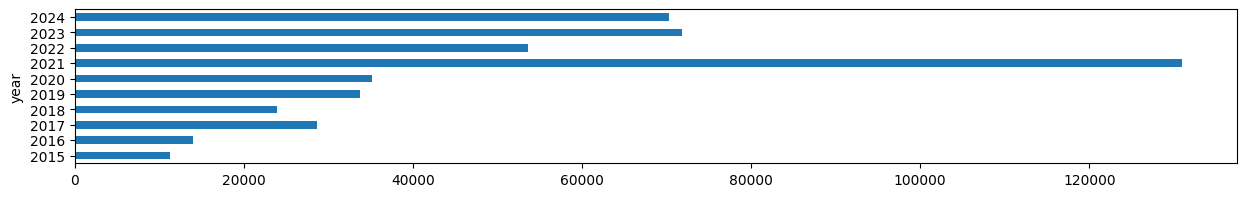

In [64]:
gifts.groupby(['year'])['value_usd'].sum().plot(kind='barh', figsize=(15,2))

### Investigating 2021 spike

In [65]:
gifts['year'].value_counts().reset_index()

,year,count
0,2024,708
1,2023,634
2,2021,592
3,2019,583
4,2017,558
5,2018,543
6,2022,432
7,2016,366
8,2015,358
9,2020,207


<Axes: ylabel='year'>

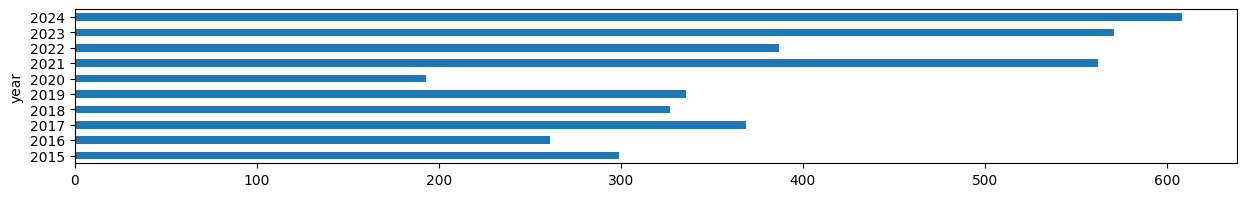

In [66]:
gifts.groupby(['year'])['value_usd'].count().plot(kind='barh', figsize=(15,2))

<Axes: ylabel='year'>

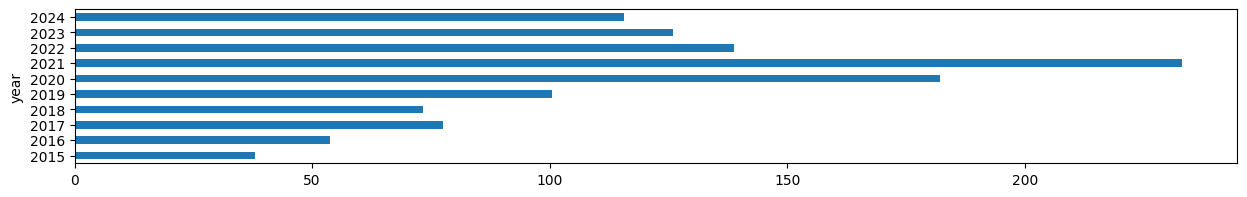

In [67]:
gifts.groupby(['year'])['value_usd'].mean().plot(kind='barh', figsize=(15,2))

In [68]:
gifts.groupby(['year'])['value_usd'].max().reset_index().sort_values(by='value_usd', ascending=False).round(2)

#it's not the number of gifts - just the more expensive ones

,year,value_usd
6,2021,35580.57
8,2023,13835.81
4,2019,11398.59
5,2020,7764.94
9,2024,5545.47
7,2022,2234.92
2,2017,1116.29
3,2018,1096.95
1,2016,898.55
0,2015,734.93


<Axes: xlabel='year'>

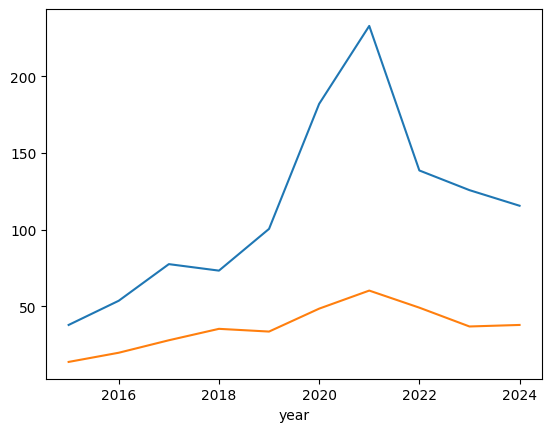

In [69]:
gifts.groupby(['year'])['value_usd'].mean().plot()
gifts.groupby(['year'])['value_usd'].median().plot()

#since median value isn't that different - this must mean there were a couple of really expensive gifts

### Male/female receiver

In [71]:
gifts[['first_name', 'last_name']] = gifts['name'].str.split(' ', n=1, expand=True)
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN,27.56,Zorana,Mihajlović
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović


In [72]:
gifts['first_name'].unique()

array(['Zorana', 'Miloš', 'Aleksandar', 'Maja', 'Vanja', 'Nebojša',
       'Zoran', 'Bratislav', 'Slavoljub', 'Dragana', 'Jorgovanka',
       'Vesna', 'Ivica', 'Goran', 'Tatjana', 'Sreten', 'Tihomir',
       'Snežana', 'Marija', 'Saša', 'Marijana', 'Zlatibor', 'Nenad',
       'Roksanda', 'Vladimir', 'Mladen', 'Dejan', 'Igor', 'Đorđe',
       'Srđan', 'Stevan', 'Milun', 'Branislav', 'Bojan', 'Milena',
       'Siniša', 'Andreja', 'Jugoslav', 'Dušanka', 'Dimitrije', 'Milorad',
       'Predrag', 'Milan', 'Katarina', 'Emina', 'Ana', 'Smiljka',
       'Zdravko', 'Antonio', 'Ivan', 'Željko', 'Duško', 'Damir',
       'Jasmina', 'Darko', 'Đuro', 'Žarko', 'Mile', 'Robert', 'Dmitar',
       'Nikola', 'Dragan', 'Jelena', 'Dragoljub', 'Ištvan', 'Dunja',
       'Olivera', 'Suzana', 'Miroslav', 'Danijela', 'Branka', 'Ljiljana',
       'Husein', 'Nemanja', 'Dušan', 'Nataša', 'Jovan', 'Agneš', 'Zoltan',
       'Tanja', 'Tomislav', 'Tamara', 'Danilo', 'Rade', 'Marko',
       'Mihailo', 'Anita', 'Žolt', 

In [73]:
gifts[gifts.first_name.isin(['Andreja', 'Vanja', 'Saša'])]

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name
71,Ministarstvo omladine i sporta,Vanja Udovičić,ministar,Poklon Vlade Republike Mađarske,2015-07-01,2015,07-2015,Protokolaran,dve šolje sa tacnama (Herend-porcelan),NaN,Da,lična svojina,NaN,NaN,Vanja,Udovičić
356,Grad Pančevo,Saša Pavlov,gradonačelnik,Aleksandar Racimor,2015-11-08,2015,11-2015,Protokolaran,metalni avion na postolju - držač za olovke,2000.0,NaN,lična svojina,NaN,18.37,Saša,Pavlov
670,Grad Pančevo,Saša Pavlov,gradonačelnik,"MADžID FAHIMPUR, AMBASADOR",2016-02-08,2016,02-2016,Protokolaran,metalni tanjir ručno oslikan u višebojnom emajalu,2500.0,NaN,lična svojina,NaN,22.46,Saša,Pavlov
671,Grad Pančevo,Saša Pavlov,gradonačelnik,"ĐORĐE IVANOV, PREDSEDNIK MAKEDONIJE",2016-10-30,2016,10-2016,Protokolaran,gravira na mesinganoj ploči sa motivom manasti...,6000.0,NaN,javna svojina,NaN,53.91,Saša,Pavlov
714,Grad Beograd,Andreja Mladenović,zamenik gradonačelnika,"Čen Jin, Zamenik gradonačelnika Šangaja",2016-11-14,2016,11-2016,Protokolaran,Porcelanska slika,NaN,Da,javna svojina,NaN,NaN,Andreja,Mladenović
1060,Ministarstvo spoljnih poslova,Saša Obradović,ambasador,General Nebojša Pavković,2017-01-20,2017,01-2017,Protokolaran,Umetnička slika ''Sumrak u Finskoj'' - Neboša ...,11900.0,NaN,javna svojina,NaN,110.70,Saša,Obradović
1061,Ministarstvo spoljnih poslova,Saša Obradović,ambasador,Firma Wiestec Oy - Helsiniki,2017-10-26,2017,10-2017,Protokolaran,Staklena vaza,17731.0,NaN,javna svojina,NaN,164.94,Saša,Obradović
1062,Ministarstvo spoljnih poslova,Saša Obradović,ambasador,"Ambasador NR Kine u Finskoj, Čen Li",2017-11-24,2017,11-2017,Protokolaran,Šolje za čaj - kineski porcelan,11900.0,NaN,javna svojina,NaN,110.70,Saša,Obradović
1063,Ministarstvo spoljnih poslova,Saša Obradović,ambasador,Srba Lukić,2017-12-12,2017,12-2017,Protokolaran,Figura od keramike ''Irvas'',8330.0,NaN,javna svojina,NaN,77.49,Saša,Obradović
3832,Ministarstvo spoljnih poslova Republike Srbije,Saša Obradović,ambasador,NaN,2023-06-19,2023,06-2023,Protokolaran,Orden komandanta prve klase reda finske bele ruže,6000.0,Ne,javna svojina,Odlazak sa dužnosti ambasador a u Finskoj,55.34,Saša,Obradović


In [74]:
exceptions = ['Nebojša', 'Ivica', 'Siniša', 'Nikola', 'Nemanja', 'Vanja', 'Saša', 'Andreja']

def guess_gender(name):
    if pd.isna(name):
        return None
    name = name.strip()
    if name in exceptions:
        return 'm'
    elif name.endswith('a'):
        return 'f'
    else:
        return 'm'

gifts['m_f'] = gifts['first_name'].apply(guess_gender)

In [75]:
gifts['m_f'].value_counts(normalize=True)

m_f
m    0.806665
f    0.193335
Name: proportion, dtype: float64

In [76]:
gifts.groupby(['m_f'])['value_usd'].sum()

m_f
f     43784.13
m    429822.12
Name: value_usd, dtype: float64

In [77]:
gifts.groupby(['m_f'])['value_usd'].count()

m_f
f     605
m    3308
Name: value_usd, dtype: int64

In [78]:
gifts.groupby(['m_f'])['value_usd'].mean()

m_f
f     72.370463
m    129.934135
Name: value_usd, dtype: float64

### Gift types

In [79]:
gifts['gift'].unique()

array(['Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KULTURNOG I PRIRODNOG NASLEĐA U MAĐARSKO SPSKOM POGRANIČNOM REGIONU',
       'Knnjiga autora Osnovana škola u Krivaji',
       'SLIKA ulje na platnu nepoznatog autora',
       'Monografija MUZEJ RAS NOVI PAZAR', 'knjiga autora RETORIKA',
       'Srpski narodni kuvar', 'Monografija manastir Dečani',
       'porculanska flaša alkoholnog pića (1l) u ukrasnoj kožnoj kutiji; sa dvema ukrasnim čašicama; dimenzije 340 x 230 x 130 mm;',
       'ulje na kartonu sa motivima Temišvara; autor Stefan Popa; dimenzije 150 x 220 mm',
       'monografija Vladalačka kuća Petrović- Njegoš; dimenzije 330x230x30mm; kožni povez',
       'ukrasni zidni kvarcni sat; u hohlomskoj dekorativnoj slikarskoj tehnici sa motivima golubica',
       'dekorativna stona porculanska kutija sa motivima lista vinove loze; dimenzije 150h100 mm;',
       'ukrasni drveni tanjir; u hohlomskoj dekorativnoj slikarskoj tehnici sa motivima Nižnjegorodskog kremlja; prečnika 300 mm',

In [80]:
def categorize_gift(description):
    description = description.lower()
    categories = []

    keyword_map = {
        'alcohol': ['vino', 'rizling', 'vinjak', 'rakija', 'vodka', 'dekanter', 'flaša', 'vina', 'viski', 'liker', 'boca', 'piće', 'rum'],
        'books': ['knjiga', 'knjige', 'publikacija', 'roman', 'monografija', 'kuvar', 'knnjiga', 'kljiga', 'rečnik'],
        'office supplies': ['olovka', 'rokovnik', 'sveska', 'kalendar', 'notes', 'stoni planer', 'penkalo', 'naliv pero'],
        'electronic supplies & devices': ['usb', 'eksterna baterija', 'smart', 'xiaomi', 'telefon'],
        'food and drinks': ['bombonjera', 'baklave', 'mantija', 'baklavama', 'urme', 'maslinovo ulje', 'ratluka', 'slatkiša', 'čokoladice', 'čokolada', 'paneton', 'med', 'urmi', 'pistaća', 'mocart kugle', 'dezert', 'morskih plodova', 'kolač', 'kafa', 'kafe'],
        'arts and religious icons': ['slika', 'tepih', 'portret', 'slike', 'ulje na', 'statua', 'umetnička instalacija', 'reprodukcija', 'replika', 'figura', 'ikona', 'skulptura'],
        'clothing and accessories': ['majica', 'ogrlica', 'kimono', 'manžetne', 'šal', 'rukavice', 'kravata', 'dres', 'nošnja', 'nošnje', 'marama', 'košulja', 'torba', 'parfem', 'ešarpa', 'novčanik', 'kaiš', 'kišobran', 'dugmad'],
        'bowls, glasses and porcelain': ['činija', 'šolje', 'poslužavnik', 'čajnik', 'tacna', 'bokal', 'vaza', 'vaze', 'šoljica', 'šolja', 'čaše', 'čaša', 'čašica', 'čašice', 'set za čaj', 'pribor za čaj', 'tanjir', 'porcelan', 'porcelana', 'porcelanski', 'porcelanska'],
        'replicas, souvenirs and coins': ['suvenir', 'novčić', 'koin', 'maketa', 'makete'],
        'weapons and ceremonial items': ['bodež', 'nož', 'mač', 'čuturica', 'pištolj', 'puška'],
        'decorations, plaques and figurines': ['ukras', 'ukrasni', 'plaketa', 'skulptura', 'figura', 'figurica'],
        'keys': ['ključ'],
        'framed images and memorabilia': ['uramljena', 'uramljen', 'memorabilija', 'uramljeni', 'album'],
        'flowers': ['buket', 'cveće', 'ruže', 'cveća', 'cvetni', 'aranžman', 'saksija'],
        'other':['']
    }

    for category, keywords in keyword_map.items():
        if any(keyword in description for keyword in keywords):
            categories.append(category)

    return ', '.join(sorted(set(categories))) if categories else None


In [81]:
gifts['gift_category'] = gifts['gift'].apply(categorize_gift)

In [82]:
all_categories = gifts['gift_category'].dropna().str.split(', ')

flat_list = [cat for sublist in all_categories for cat in sublist]
category_counts = Counter(flat_list)

category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)
category_df

,count
other,4981
arts and religious icons,1060
decorations,780
plaques and figurines,780
bowls,679
glasses and porcelain,679
books,610
alcohol,519
framed images and memorabilia,454
souvenirs and coins,320


### Who kept the gifts & what

A public official or their family member may keep a gift if its value **does not exceed 10% of the average monthly salary (before taxes)** in Serbia — and **only** if the total value of all gifts kept in one calendar year does not exceed one average monthly salary. 

*A gift kept by a family member counts toward the official’s annual limit.*

#### Prepping the data

Average yearly earnings, source [Statistical Office of the Republic of Serbia](https://data.stat.gov.rs/Home/Result/2403040101?languageCode=en-US&displayMode=table&guid=fec8885d-152a-4827-8bea-f9ed19deb9a4)

Average yearly earnings, source [Statistical Office of the Republic of Serbia](https://data.stat.gov.rs/Home/Result/2403040401?languageCode=en-US&displayMode=table&guid=6ef2cc15-31a9-4c4b-9890-b2d53ef3d2aa)

In [83]:
gifts.head(1)

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"books, other"


In [84]:
monthly = pd.read_excel('monthly net average.xlsx')
monthly.head()

,months,monthly_avg_income
0,2015/january,39285
1,2015/february,42749
2,2015/march,43121
3,2015/april,45605
4,2015/may,43964


In [85]:
monthly['month'] = pd.to_datetime(monthly['months'], format='%Y/%B').dt.strftime('%m-%Y')
monthly['monthly_ten_percent'] = monthly['monthly_avg_income'] * 0.1
monthly.head()

,months,monthly_avg_income,month,monthly_ten_percent
0,2015/january,39285,01-2015,3928.5
1,2015/february,42749,02-2015,4274.9
2,2015/march,43121,03-2015,4312.1
3,2015/april,45605,04-2015,4560.5
4,2015/may,43964,05-2015,4396.4


In [86]:
monthly.drop(columns='months', inplace=True)
monthly.drop(columns='monthly_avg_income', inplace=True)
monthly.head()

,month,monthly_ten_percent
0,01-2015,3928.5
1,02-2015,4274.9
2,03-2015,4312.1
3,04-2015,4560.5
4,05-2015,4396.4


In [87]:
gifts.shape

(4981, 18)

In [88]:
gifts = pd.merge(gifts, monthly, on="month", how="left")
gifts.head(3)

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"books, other",3928.5
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",3928.5
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"arts and religious icons, other",3928.5


In [89]:
gifts.shape

(4981, 19)

#### Who kept their gifts

In [90]:
gifts['ownership'].unique()

array(['javna svojina', 'lična svojina'], dtype=object)

In [91]:
vucic_personal = gifts[
    (gifts['name'].str.lower() == 'aleksandar vučić') &
    (gifts['ownership'].str.lower() == 'lična svojina')
]

vucic_personal.head(10)

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent
2593,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2020-09-04,2020,09-2020,Protokolaran,"Hemijska olovka kojom je potpisan ""Vašingtonsk...",6000.0,Ne,lična svojina,Sastanak sa predsedni kom Republike,58.24,Aleksandar,Vučić,m,"office supplies, other",5969.8
2594,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2020-09-04,2020,09-2020,Protokolaran,Ključ od Bele kuće.,5000.0,Ne,lična svojina,Sastanak sa predsedni kom Republike,48.53,Aleksandar,Vučić,m,"keys, other",5969.8
2595,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2020-12-23,2020,12-2020,Protokolaran,Dva metalna stalka za bocu.,5000.0,Ne,lična svojina,Novogodiš nji poklon,48.53,Aleksandar,Vučić,m,other,6609.2
2596,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2020-12-04,2020,12-2020,Protokolaran,Tri flaše vina.,5000.0,Ne,lična svojina,Sastanak sa predsedni kom Republike,48.53,Aleksandar,Vučić,m,"alcohol, other",6609.2
2758,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2021-04-28,2021,04-2021,Prigodan,Flaša manastirske rakije.,3500.0,Ne,lična svojina,"Uručeno poserdno, preko generalnog sekretara p...",35.18,Aleksandar,Vučić,m,"alcohol, other",6494.8
2790,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2021-07-15,2021,07-2021,Prigodan,Naočare za vid.,2000.0,Ne,lična svojina,Poseta predsedni ka Republike DZ Palilula u Borči,20.10,Aleksandar,Vučić,m,other,6473.1


In [92]:
personal_gifts = gifts[gifts.ownership == 'lična svojina']
personal_gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",3928.5
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",4274.9
70,Ministarstvo rudarstva i energetike,Aleksandar Antić,ministar,Ambasada Države Katar,2015-05-26,2015,05-2015,Prigodan,Kula sat,2000.0,NaN,lična svojina,NaN,18.37,Aleksandar,Antić,m,other,4396.4
71,Ministarstvo omladine i sporta,Vanja Udovičić,ministar,Poklon Vlade Republike Mađarske,2015-07-01,2015,07-2015,Protokolaran,dve šolje sa tacnama (Herend-porcelan),NaN,Da,lična svojina,NaN,NaN,Vanja,Udovičić,m,"bowls, glasses and porcelain, other",4560.1
92,Ministarstvo odbrane,Zoran Đorđević,državni sekretar,Ambasador Islamske Republike Iran,2015-01-30,2015,01-2015,Protokolaran,Keramička vaza,400.0,NaN,lična svojina,NaN,3.67,Zoran,Đorđević,m,"bowls, glasses and porcelain, other",3928.5


In [93]:
personal_gifts.shape

(1027, 19)

In [94]:
print(f"{(gifts['name'].nunique())} officials got at least one gift in the last decade")
print(f"{personal_gifts['name'].nunique()} officials kept at least one")

171 officials got at least one gift in the last decade
85 officials kept at least one


In [95]:
personal_gifts['name'].value_counts().head()

name
Zoran Stojković        176
Branislav Nedimović     76
Bratislav Gašić         64
Zoran Panović           63
Predrag Bandić          60
Name: count, dtype: int64

In [96]:
personal_gifts.groupby(['name'])['value_usd'].sum().reset_index().sort_values(by='value_usd', ascending=False).round(2).head(10)

,name,value_usd
78,Zoran Stojković,2960.36
11,Branislav Nedimović,1321.79
56,Predrag Bandić,1237.33
71,Tomislav Žigmanov,930.10
49,Nemanja Starović,830.80
13,Bratislav Gašić,702.57
30,Jelena Tanasković,671.08
79,Zoran Đorđević,564.59
64,Slavoljub Dabić,544.74
70,Tomislav Momirović,532.23


In [97]:
personal_gifts.groupby(['name', 'year'])['value_usd'].sum().reset_index().sort_values(by='value_usd', ascending=False).round(2).head(10)

,name,year,value_usd
94,Nemanja Starović,2023,683.48
107,Predrag Bandić,2023,634.62
154,Zoran Stojković,2019,558.60
136,Tomislav Momirović,2023,532.23
158,Zoran Stojković,2023,514.71
157,Zoran Stojković,2022,505.06
138,Tomislav Žigmanov,2024,492.89
108,Predrag Bandić,2024,491.68
137,Tomislav Žigmanov,2023,437.21
21,Branislav Nedimović,2019,435.10


In [98]:
categories_personal = personal_gifts['gift_category'].dropna().str.split(', ')

flat_list = [cat for sublist in categories_personal for cat in sublist]
category_counts = Counter(flat_list)

categories = pd.DataFrame.from_dict(category_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)
categories

,count
other,1027
alcohol,380
food and drinks,113
books,108
bowls,108
glasses and porcelain,108
office supplies,93
clothing and accessories,84
decorations,80
plaques and figurines,80


### Over-the-limit gifts

In [99]:
personal_gifts.head(3)

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",3928.5
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",4274.9
70,Ministarstvo rudarstva i energetike,Aleksandar Antić,ministar,Ambasada Države Katar,2015-05-26,2015,05-2015,Prigodan,Kula sat,2000.0,NaN,lična svojina,NaN,18.37,Aleksandar,Antić,m,other,4396.4


In [100]:
personal_gifts.dtypes

public_institution             object
name                           object
role                           object
giver                          object
date_received          datetime64[ns]
year                            int64
month                          object
gift_type                      object
gift                           object
value_rsd                     float64
estimating                     object
ownership                      object
occasion                       object
value_usd                     float64
first_name                     object
last_name                      object
m_f                            object
gift_category                  object
monthly_ten_percent           float64
dtype: object

In [101]:
def check_limit(row):
    if row['value_rsd'] > row['monthly_ten_percent']:
        return row['value_rsd'] - row['monthly_ten_percent']
    else:
        return "didn't exceed the limit"

personal_gifts['monthly_exceeded'] = personal_gifts.apply(check_limit, axis=1)

/var/folders/7x/_n1fx4s51y1f2zwhqgxw_q2m0000gn/T/ipykernel_2545/3256610746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_gifts['monthly_exceeded'] = personal_gifts.apply(check_limit, axis=1)


In [102]:
personal_gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent,monthly_exceeded
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",3928.5,didn't exceed the limit
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",4274.9,didn't exceed the limit
70,Ministarstvo rudarstva i energetike,Aleksandar Antić,ministar,Ambasada Države Katar,2015-05-26,2015,05-2015,Prigodan,Kula sat,2000.0,NaN,lična svojina,NaN,18.37,Aleksandar,Antić,m,other,4396.4,didn't exceed the limit
71,Ministarstvo omladine i sporta,Vanja Udovičić,ministar,Poklon Vlade Republike Mađarske,2015-07-01,2015,07-2015,Protokolaran,dve šolje sa tacnama (Herend-porcelan),NaN,Da,lična svojina,NaN,NaN,Vanja,Udovičić,m,"bowls, glasses and porcelain, other",4560.1,didn't exceed the limit
92,Ministarstvo odbrane,Zoran Đorđević,državni sekretar,Ambasador Islamske Republike Iran,2015-01-30,2015,01-2015,Protokolaran,Keramička vaza,400.0,NaN,lična svojina,NaN,3.67,Zoran,Đorđević,m,"bowls, glasses and porcelain, other",3928.5,didn't exceed the limit


In [103]:
monthly_exceeded = personal_gifts[personal_gifts['monthly_exceeded'] != "didn't exceed the limit"]
monthly_exceeded

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent,monthly_exceeded
776,Grad Kraljevo,Predrag Terzić,gradonačelnik,"Džim Diodati, gradonačelnik grada Nijagara Fol...",2017-06-25,2017,06-2017,Protokolaran,karta za letenje helikopterom i za vožnju brod...,16000.0,NaN,lična svojina,NaN,148.84,Predrag,Terzić,m,other,4923.8,11076.2
2593,Generalni sekretarijat Predsednika Republike,Aleksandar Vučić,predsednik republike,NaN,2020-09-04,2020,09-2020,Protokolaran,"Hemijska olovka kojom je potpisan ""Vašingtonsk...",6000.0,Ne,lična svojina,Sastanak sa predsedni kom Republike,58.24,Aleksandar,Vučić,m,"office supplies, other",5969.8,30.2
3793,Ministarstvo spoljnih poslova Republike Srbije,Goran Bradić,ambasador,NaN,2023-05-14,2023,05-2023,Prigodan,Crkvena ikona 40x60 cm,9000.0,Ne,lična svojina,Slava crkvene opštine u Bernu,83.01,Goran,Bradić,m,"arts and religious icons, other",8622.0,378.0


In [104]:
gifts_per_year = personal_gifts.groupby(['name', 'year'])['value_rsd'].sum().reset_index().sort_values(by='value_rsd', ascending=False).round(2)
gifts_per_year

,name,year,value_rsd
94,Nemanja Starović,2023,74100.0
107,Predrag Bandić,2023,68800.0
154,Zoran Stojković,2019,58800.0
136,Tomislav Momirović,2023,57700.0
157,Zoran Stojković,2022,56500.0
...,...,...,...
37,Dušanka Golubović,2016,700.0
18,Antonio Ratković,2017,700.0
6,Aleksandar Tasić,2023,0.0
71,Maja Gojković,2017,0.0


In [105]:
yearly = pd.read_excel('yearly net average.xlsx')
yearly

,year,yearly_avg_income
0,2015,44432
1,2016,46097
2,2017,47893
3,2018,49650
4,2019,54919
5,2020,60073
6,2021,65864
7,2022,74933
8,2023,86007
9,2024,98143


In [106]:
yearly_exceeded = pd.merge(gifts_per_year, yearly, on="year", how="left")
yearly_exceeded.head()

,name,year,value_rsd,yearly_avg_income
0,Nemanja Starović,2023,74100.0,86007
1,Predrag Bandić,2023,68800.0,86007
2,Zoran Stojković,2019,58800.0,54919
3,Tomislav Momirović,2023,57700.0,86007
4,Zoran Stojković,2022,56500.0,74933


In [107]:
yearly_exceeded.shape

(169, 4)

In [108]:
def check_limit(row):
    if row['value_rsd'] > row['yearly_avg_income']:
        return row['value_rsd'] - row['yearly_avg_income']
    else:
        return "didn't exceed the limit"

yearly_exceeded['yearly_exceeds'] = yearly_exceeded.apply(check_limit, axis=1)
yearly_exceeded

,name,year,value_rsd,yearly_avg_income,yearly_exceeds
0,Nemanja Starović,2023,74100.0,86007,didn't exceed the limit
1,Predrag Bandić,2023,68800.0,86007,didn't exceed the limit
2,Zoran Stojković,2019,58800.0,54919,3881.0
3,Tomislav Momirović,2023,57700.0,86007,didn't exceed the limit
4,Zoran Stojković,2022,56500.0,74933,didn't exceed the limit
...,...,...,...,...,...
164,Dušanka Golubović,2016,700.0,46097,didn't exceed the limit
165,Antonio Ratković,2017,700.0,47893,didn't exceed the limit
166,Aleksandar Tasić,2023,0.0,86007,didn't exceed the limit
167,Maja Gojković,2017,0.0,47893,didn't exceed the limit


In [109]:
yearly_exceeded = yearly_exceeded[yearly_exceeded['yearly_exceeds'] != "didn't exceed the limit"]
yearly_exceeded

,name,year,value_rsd,yearly_avg_income,yearly_exceeds
2,Zoran Stojković,2019,58800.0,54919,3881.0
9,Bratislav Gašić,2015,47050.0,44432,2618.0


#### Unkown value of the gift

In [110]:
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category,monthly_ten_percent
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"books, other",3928.5
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",3928.5
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"arts and religious icons, other",3928.5
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,NaN,javna svojina,NaN,27.56,Zorana,Mihajlović,f,"books, other",3928.5
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other",4274.9


In [111]:
gifts.drop(columns='monthly_ten_percent', inplace=True)
gifts.insert(10, 'no_value', gifts['value_rsd'].isna().map({True: 'yes', False: 'no'}))

In [112]:
gifts.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,no_value,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,yes,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"books, other"
1,Vlada Republike Srbije,Zorana Mihajlović,ministar,Vitomir Nikolić,2015-01-30,2015,01-2015,Prigodan,Knnjiga autora Osnovana škola u Krivaji,1000.0,no,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other"
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,yes,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"arts and religious icons, other"
3,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,Monografija MUZEJ RAS NOVI PAZAR,3000.0,no,NaN,javna svojina,NaN,27.56,Zorana,Mihajlović,f,"books, other"
4,Vlada Republike Srbije,Zorana Mihajlović,ministar,Božidar Roganović,2015-02-02,2015,02-2015,Prigodan,knjiga autora RETORIKA,1000.0,no,NaN,lična svojina,NaN,9.19,Zorana,Mihajlović,f,"books, other"


In [113]:
gifts['estimating'].unique()

array(['Da', nan, 'Ne'], dtype=object)

In [114]:
no_values = gifts[gifts.no_value == "yes"]
no_values.head()

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,no_value,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category
0,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Bečej,2015-01-29,2015,01-2015,Protokolaran,Monografija OTKRIVANjE NAŠEG ZABORAVLjENOG KUL...,NaN,yes,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"books, other"
2,Vlada Republike Srbije,Zorana Mihajlović,ministar,Opština Novi Pazar,2015-01-29,2015,01-2015,Protokolaran,SLIKA ulje na platnu nepoznatog autora,NaN,yes,Da,javna svojina,NaN,NaN,Zorana,Mihajlović,f,"arts and religious icons, other"
45,Narodna skupština Republike Srbije,Maja Gojković,predsednik,Ambasador Rumunije Daniel Banu,2015-03-11,2015,03-2015,Prigodan,Disk sa pesmama Georga Eneskua,NaN,yes,Da,javna svojina,NaN,NaN,Maja,Gojković,f,other
46,Narodna skupština Republike Srbije,Maja Gojković,predsednik,Ambasador Rumunije Daniel Banu,2015-03-11,2015,03-2015,Prigodan,"Knjiga ""Romania Panoramic""",NaN,yes,Da,javna svojina,NaN,NaN,Maja,Gojković,f,"books, other"
47,Narodna skupština Republike Srbije,Maja Gojković,predsednik,Predsednik Republike Bugarske Rosen Plevneliev,2015-03-12,2015,03-2015,Protokolaran,Figura bika,NaN,yes,Da,javna svojina,NaN,NaN,Maja,Gojković,f,"arts and religious icons, decorations, plaques..."


In [115]:
len(no_values)

#1068 gifts remained without estimated price

1068

In [116]:
no_values_est = gifts[(gifts.no_value == "yes") & (gifts.estimating != "Da")]
no_values_est.head()

#all of the gifts without values are - formally - being still estimated

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,no_value,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category


In [117]:
no_values['ownership'].value_counts()

ownership
javna svojina    1060
lična svojina       8
Name: count, dtype: int64

In [118]:
no_values_kept = gifts[(gifts['no_value'] == "yes") & (gifts['ownership'] == "lična svojina")]
no_values_kept

,public_institution,name,role,giver,date_received,year,month,gift_type,gift,value_rsd,no_value,estimating,ownership,occasion,value_usd,first_name,last_name,m_f,gift_category
71,Ministarstvo omladine i sporta,Vanja Udovičić,ministar,Poklon Vlade Republike Mađarske,2015-07-01,2015,07-2015,Protokolaran,dve šolje sa tacnama (Herend-porcelan),NaN,yes,Da,lična svojina,NaN,NaN,Vanja,Udovičić,m,"bowls, glasses and porcelain, other"
1176,"Ministarstvo poljoprivrede, šumarstva i vodopr...",Branislav Nedimović,ministar,Ambasador NR Kine,2017-12-25,2017,12-2017,Prigodan,Alkoholno piće,NaN,yes,Da,lična svojina,NaN,NaN,Branislav,Nedimović,m,"alcohol, other"
1180,"Ministarstvo poljoprivrede, šumarstva i vodopr...",Branislav Nedimović,ministar,Eco energo,2017-12-25,2017,12-2017,Prigodan,Porcelanska tacna,NaN,yes,Da,lična svojina,NaN,NaN,Branislav,Nedimović,m,"bowls, glasses and porcelain, other"
1222,Narodna skupština Republike Srbije,Maja Gojković,predsednik,Ambasador Belorusije,2017-05-25,2017,05-2017,Protokolaran,"Knjiga Minsk, venac Belorusija",NaN,yes,Da,lična svojina,NaN,NaN,Maja,Gojković,f,"books, other"
1494,Ministarstvo unutrašnjih poslova,Nebojša Stefanović,ministar,ministar unutrašnjih poslova Švajcarske Konfed...,2018-01-24,2018,01-2018,Protokolaran,hemijska olovka,NaN,yes,Da,lična svojina,NaN,NaN,Nebojša,Stefanović,m,"office supplies, other"
2708,"Ministarstvo trgovine, turizma i telekomunikacija",Olivera Jocić,v.d. pomoćnika ministra,NaN,2021-12-20,2021,12-2021,Prigodan,VINO-DVE FLAŠE UKRAJINSKOG VINA,NaN,yes,Da,lična svojina,BOŽIĆNI I NOVOGODI ŠNjI PRAZNICI,NaN,Olivera,Jocić,f,"alcohol, other"
3824,Ministarstvo spoljnih poslova Republike Srbije,Marko Đurić,ambasador,NaN,2023-09-08,2023,09-2023,Protokolaran,Drvena kutija sa obeležjem - države Ohajo i ko...,NaN,yes,Da,lična svojina,Zvanična poseta delegacije Ohaja Srbiji,NaN,Marko,Đurić,m,other
4929,"Ministarstvo za rad, zapošljavanje, boračka i ...",Nemanja Starović,ministar,NaN,2024-08-30,2024,08-2024,Protokolaran,"Gipsani reljef „Knez Lazar i kneginja Milica“,...",NaN,yes,Da,lična svojina,poklon u znak zahvale,NaN,Nemanja,Starović,m,other


In [119]:
len(no_values_kept)

8